# Analysis and Insights

### by Saravanan Natarajan

### Import libraries

In [93]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np
import sqlalchemy

%matplotlib inline

In [94]:
matplotlib.style.use('ggplot')

Read the master data from SQL, we can also read it from CSV

In [96]:
#df_master = pd.read_csv('twitter_archive_master.csv')
engine = sqlalchemy.create_engine('sqlite:///twitter_archive_master.db')
df_master = pd.read_sql('SELECT * FROM master', engine)
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
favorites             1994 non-null int64
retweets              1994 non-null int64
dog_breed             1994 non-null object
confidence            1994 non-null float64
dog_type              1994 non-null object
dog_name              1369 non-null object
dog_gender            862 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 264.9+ KB


### Favourites and retweets

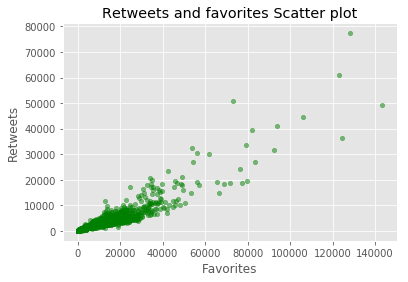

In [154]:
df_master.plot(kind = 'scatter', x = 'favorites', y = 'retweets', alpha = 0.5, color = 'green')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')
plt.figure(1, figsize = (11, 8.5))
plt.show()

`Favorites` count and `Retweets` count are correlated pretty strongly. Let’s analyse further the data.

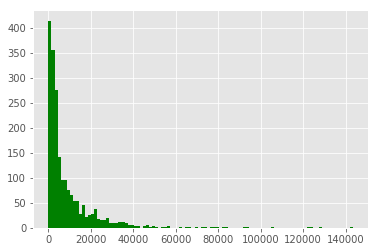

In [113]:
plt.hist(x = df_master.favorites, bins = 100, color = 'green')
plt.show()

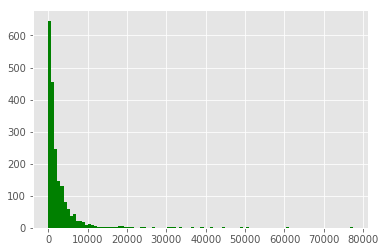

In [114]:
plt.hist(x = df_master.retweets, bins = 100, color = 'green')
plt.show()

The distribution of `Retweets` count and `Favorites` count look similar. We will further analyse using log values.

### Log value of favorites and retweets

In [115]:
to_log = ['favorites', 'retweets']
df_logged = df_master[to_log].applymap(lambda x: np.log10(x))

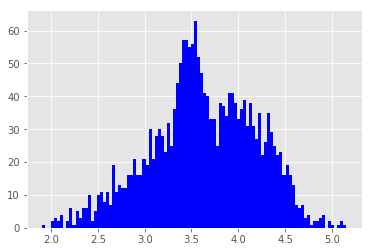

In [116]:
plt.hist(x = df_logged.favorites, bins = 100, color = 'blue')
plt.show()

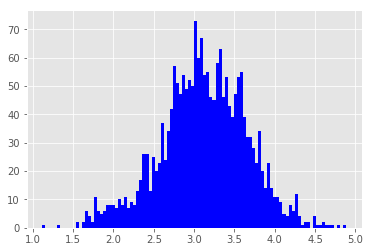

In [117]:
plt.hist(x = df_logged.retweets, bins = 100, color = 'blue')
plt.show()

The log transformation of `Retweets` count and `Favorites` count makes them appear more normal.

### Corelation coefficient

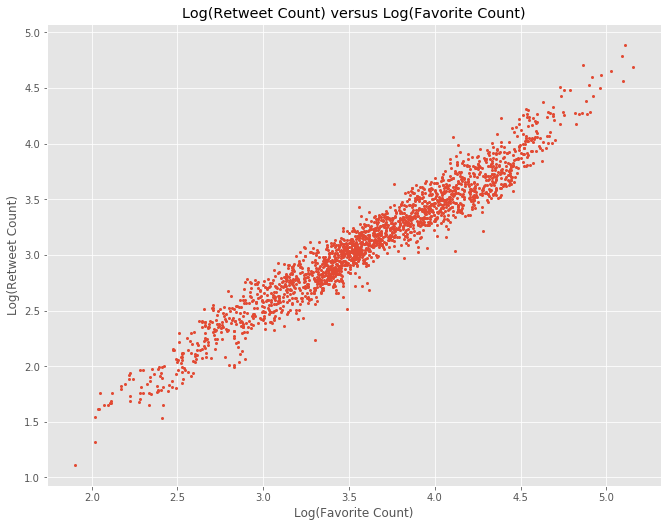

0.96796386832658809

In [118]:
plt.figure(1, figsize = (11, 8.5))
plt.plot(df_logged.favorites, df_logged.retweets, marker='o', linestyle='', ms=2 )
plt.title('Log(Retweet Count) versus Log(Favorite Count)')
plt.xlabel('Log(Favorite Count)')
plt.ylabel('Log(Retweet Count)')
plt.show()
np.corrcoef(df_logged.retweets, df_logged.favorites)[0][1]

`Favorites` and `Retweets` have a pretty strong direct relationship.

Make sure the timestamp is data time format.

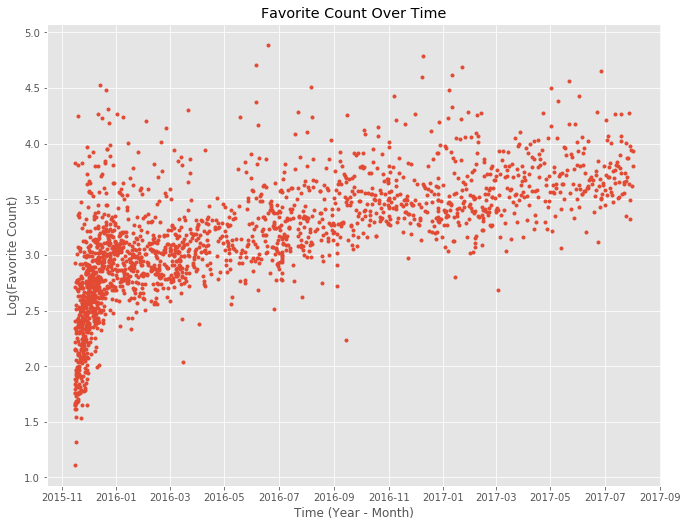

In [119]:
df_master.timestamp = pd.to_datetime(df_master.timestamp)
plt.figure(1, figsize = (11, 8.5))
plt.plot(df_master.timestamp ,df_logged.retweets, marker = 'o', linestyle = '', ms = 3)
plt.title('Favorite Count Over Time')
plt.xlabel('Time (Year - Month)')
plt.ylabel('Log(Favorite Count)')
plt.show()

The popularity of `WeRateDogs` were peak during the year 2015. With steady amount of growth during the successive years. It also started slow down once the hype cooled down.

### Source of tweet

Text(0.5,1,'Tweet utility source')

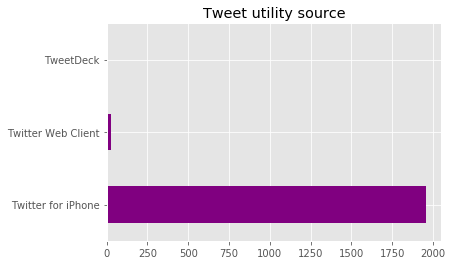

In [120]:
df_master.source.value_counts().plot(kind = 'barh', color = 'purple')
plt.title('Tweet utility source')

In [128]:
df_master.source.describe()

count                   1994
unique                     3
top       Twitter for iPhone
freq                    1955
Name: source, dtype: object

Most people used `iPhone` as the source for tweet, since it has camera and internet, it's easy to tweet.

### Rating System

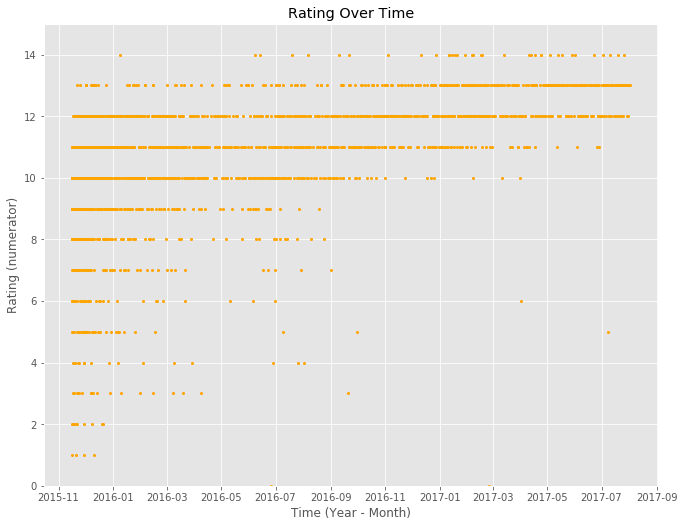

In [124]:
plt.figure(1, figsize = (11, 8.5))
plt.plot(df_master.timestamp, df_master.rating_numerator, marker='o', linestyle='', ms = 2, color = 'orange')
plt.ylim(0,15)
plt.title('Rating Over Time')
plt.ylabel('Rating (numerator)')
plt.xlabel('Time (Year - Month)')
plt.show()

* More than 75% of the data has more than 12/10 as rating
* The [They're good dogs Brent](http://knowyourmeme.com/memes/theyre-good-dogs-brent) meme/tweet was tweeted on September 12th 2016. The rating system shifted to exclusively ratings that are a 10 or higher around 2016-09.

### Famous dog gender

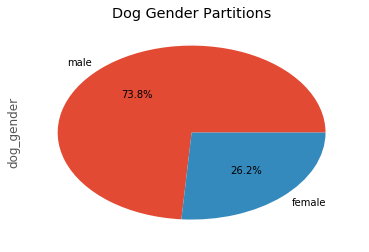

In [143]:
df_master[df_master['dog_gender'].notnull()]['dog_gender'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.figure(1, figsize = (11, 8.5))
plt.title('Dog Gender Partitions')
plt.show()

In [129]:
df_master[['dog_gender', 'rating_numerator']][df_master.dog_gender.notnull()].groupby('dog_gender').mean()

,rating_numerator
dog_gender,
female,11.858407
male,10.825472


* It's clear that `male` dogs were more famous among the tweets, the same can be used as prediction model for further analysis.
* `female` rating mean is more than the `male` rating mean.

### Famous dog breed

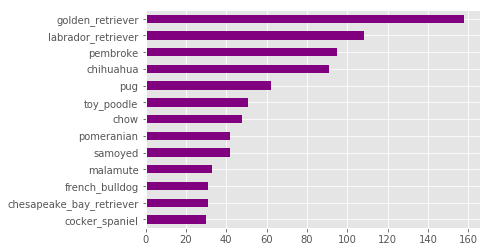

In [157]:
only_dogs = df_master['dog_breed'] != 'Unidentifiable'
df_master[only_dogs].dog_breed.value_counts()[12::-1].plot(kind='barh', color = 'purple')

In [163]:
df_by_breed.groupby('dog_breed')['confidence'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_breed,,,,,,,,
Unidentifiable,308.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
beagle,20.0,0.488758,0.321281,0.000216,0.309089,0.432760,0.723097,0.993333
cardigan,21.0,0.486599,0.280289,0.043627,0.229944,0.566911,0.700182,0.984725
chesapeake_bay_retriever,31.0,0.429673,0.290641,0.003523,0.177652,0.382220,0.698747,0.878822
chihuahua,91.0,0.523031,0.295237,0.001252,0.289647,0.505370,0.765064,0.993661
chow,48.0,0.537033,0.325614,0.002307,0.264277,0.523126,0.810526,0.999953
cocker_spaniel,30.0,0.485912,0.279093,0.002713,0.311455,0.426099,0.733847,0.991011
eskimo_dog,22.0,0.379626,0.210454,0.027494,0.209661,0.440054,0.529070,0.682082
french_bulldog,31.0,0.662573,0.327298,0.018759,0.404999,0.719559,0.943328,0.999201


Based on pie chart and the confidence value the famous dog breeds were `Golden_retriver` and `Labrador_retriver`.

### Famous dog type

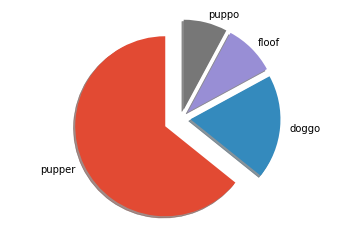

In [149]:
dog_type_count = list(df_master[df_master['dog_type'] != 'None']['dog_type'].value_counts())[0:4]
dog_types = df_master[df_master['dog_type'] != 'None']['dog_type'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_type_count, explode = explode, labels = dog_types, shadow = True, startangle = 90)
ax1.axis('equal') 
plt.figure(1, figsize = (11, 8.5))
plt.show()

In [141]:
df_master.groupby('dog_type').tweet_id.count()

dog_type
None      1625
doggo       69
floof       34
pupper     237
puppo       29
Name: tweet_id, dtype: int64

Based on the tweet_id we have type `None` as the highest.

## Conclusion

During the start of the project the Twitter account WeRateDogs (@dog_rates) was humorous. Didn’t have any confidence on learning, but wrangling data gave lots of insight about Data Analysis. Various data about favourites and retweets count gave us correlation between the data. The value 0.9679 shows strong positive relationship between favourites and retweets.

The rating system is also one of the reason for the popularity of WeRateDogs.
We tried to explore various data such as source of tweet, famous dog gender, famous dog breeds and famous dog type.

We have lots of potential to have data analysis, by exploring the various images in prediction data and JSON data in twitter API :)